# **Task 1: Time Series**

## **Importing Libraries**

In [ ]:
import numpy as np  # For numerical computations and handling arrays
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For creating statistical visualizations
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix  # For model evaluation
from sklearn.preprocessing import MinMaxScaler  # For normalizing data to a specific range
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing subsets
import tensorflow as tf  # TensorFlow library for deep learning
from tensorflow.keras.models import Sequential  # To define a sequential model in Keras
from tensorflow.keras.layers import LSTM, Dense, Dropout  # For building LSTM layers and dense neural networks
from statsmodels.tsa.seasonal import seasonal_decompose  # For time series decomposition into trend, seasonal, and residual components
import os
from tensorflow.keras.callbacks import ModelCheckpoint

## **Data Loading and Initial Exploration**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/TemperatureRainFall.csv')

# Displaying the first few rows of the dataset to understand its structure and contents
df.head()

,Date,MinTemp,MaxTemp,9amTemp,3pmTemp,Rainfall
0,01/12/2008,13.4,22.9,16.9,21.8,0.6
1,02/12/2008,7.4,25.1,17.2,24.3,0.0
2,03/12/2008,12.9,25.7,21.0,23.2,0.0
3,04/12/2008,9.2,28.0,18.1,26.5,0.0
4,05/12/2008,17.5,32.3,17.8,29.7,1.0


In [ ]:
# Displaying the last few rows of the dataset to check the data at the end of the file
df.tail()

,Date,MinTemp,MaxTemp,9amTemp,3pmTemp,Rainfall
3006,21/06/2017,1.2,15.2,2.9,14.3,0.4
3007,22/06/2017,0.8,13.4,3.6,13.3,0.0
3008,23/06/2017,1.1,11.9,2.7,10.2,0.0
3009,24/06/2017,1.1,14.1,3.9,13.1,0.2
3010,25/06/2017,3.9,10.9,6.4,8.8,0.0


In [ ]:
# Displaying summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3011 non-null   object 
 1   MinTemp   3005 non-null   float64
 2   MaxTemp   3010 non-null   float64
 3   9amTemp   3007 non-null   float64
 4   3pmTemp   3007 non-null   float64
 5   Rainfall  2991 non-null   float64
dtypes: float64(5), object(1)
memory usage: 141.3+ KB


In [ ]:
# Checking the dimensions of the dataset
df.shape

(3011, 6)

In [ ]:
# Listing all column names in the dataset
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', '9amTemp', '3pmTemp', 'Rainfall'], dtype='object')

In [ ]:
# Displaying the data types of all columns in the dataset
df.dtypes

,0
Date,object
MinTemp,float64
MaxTemp,float64
9amTemp,float64
3pmTemp,float64
Rainfall,float64


In [ ]:
# Checking for missing values in each column
df.isnull().sum()

,0
Date,0
MinTemp,6
MaxTemp,1
9amTemp,4
3pmTemp,4
Rainfall,20


In [ ]:
# Filtering rows that contain any missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Displaying the rows with missing values
rows_with_missing_values

,Date,MinTemp,MaxTemp,9amTemp,3pmTemp,Rainfall
14,16/12/2008,9.8,27.7,17.3,26.2,NaN
282,11/09/2009,NaN,18.8,8.7,18.1,NaN
433,10/02/2010,21.7,35.6,25.2,32.9,NaN
434,12/02/2010,22.5,29.1,23.4,26.4,NaN
439,18/02/2010,NaN,31.2,21.0,30.0,NaN
447,27/02/2010,NaN,26.3,20.8,24.8,NaN
449,02/03/2010,11.2,28.5,16.6,26.5,NaN
451,04/03/2010,15.1,NaN,20.1,28.6,0.0
452,05/03/2010,NaN,22.3,20.9,20.1,0.0
457,11/03/2010,12.3,24.4,15.2,22.8,NaN


In [ ]:
# Checking the shape of the DataFrame containing rows with missing values
rows_with_missing_values.shape

(30, 6)

## **Data Exploration and Visualization**

In [ ]:
# Generating descriptive statistics for the numerical columns in the dataset
df.describe()

,MinTemp,MaxTemp,9amTemp,3pmTemp,Rainfall
count,3005.000000,3010.000000,3007.000000,3007.000000,2991.000000
mean,9.520899,22.630963,14.348620,21.364716,1.925710
std,6.062028,7.796728,6.373137,7.525479,6.249052
min,-2.800000,6.800000,0.300000,6.400000,0.000000
25%,4.700000,15.800000,9.200000,14.900000,0.000000
50%,9.100000,21.900000,14.100000,20.600000,0.000000
75%,14.300000,28.900000,19.300000,27.200000,0.400000
max,28.300000,44.800000,34.500000,43.400000,104.200000


In [ ]:
# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
# Checking the data types of the columns after converting 'Date' to datetime format
df.dtypes

,0
Date,datetime64[ns]
MinTemp,float64
MaxTemp,float64
9amTemp,float64
3pmTemp,float64
Rainfall,float64


In [ ]:
# Finding the minimum and maximum dates in the 'Date' column
start_date = df['Date'].min().date()  # Get the earliest date in the dataset
end_date = df['Date'].max().date()  # Get the latest date in the dataset

# Printing the date range covered by the dataset
print(f"The date range covered is from {start_date} to {end_date}.")

The date range covered is from 2008-12-01 to 2017-06-25.


In [ ]:
# Generate a complete date range between the first and the last date
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())

# Identify missing dates
missing_dates = date_range.difference(df['Date'])

# Display the results
if len(missing_dates) > 0:
    print(f"There are {len(missing_dates)} missing days in the data.")
    print("Here are the missing dates:")
    print(missing_dates)
else:
    print("No missing dates in the data.")

There are 118 missing days in the data.
Here are the missing dates:
DatetimeIndex(['2008-12-15', '2009-09-10', '2010-02-09', '2010-02-11',
               '2010-02-17', '2010-02-26', '2010-03-01', '2010-03-10',
               '2010-08-04', '2011-04-01',
               ...
               '2014-06-04', '2014-09-21', '2014-09-22', '2014-09-23',
               '2014-10-02', '2017-02-19', '2017-03-12', '2017-03-20',
               '2017-03-21', '2017-03-22'],
              dtype='datetime64[ns]', length=118, freq=None)


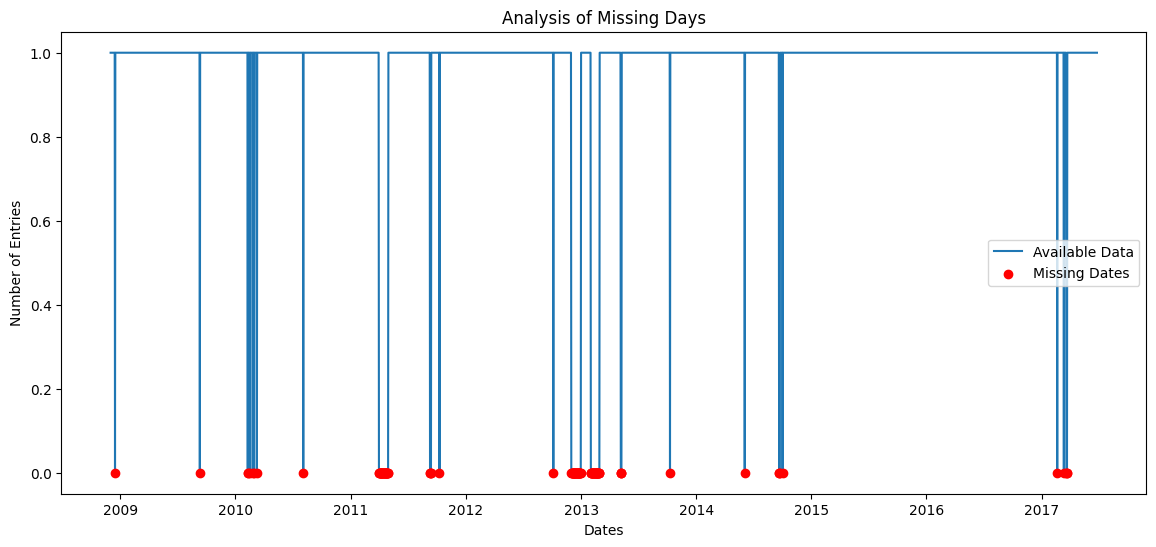

In [ ]:
# Count the number of data entries per date
data_counts = df['Date'].value_counts().sort_index()

# Create a DataFrame with all dates
full_data = pd.DataFrame(index=date_range)
full_data['count'] = data_counts

# Identify missing days
full_data['count'] = full_data['count'].fillna(0)

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(full_data.index, full_data['count'], label='Available Data')
plt.scatter(missing_dates, [0] * len(missing_dates), color='red', label='Missing Dates', zorder=5)
plt.title('Analysis of Missing Days')
plt.xlabel('Dates')
plt.ylabel('Number of Entries')
plt.legend()
plt.show()

In [ ]:
# Checking for duplicate rows in the dataset
df.duplicated().sum()

0

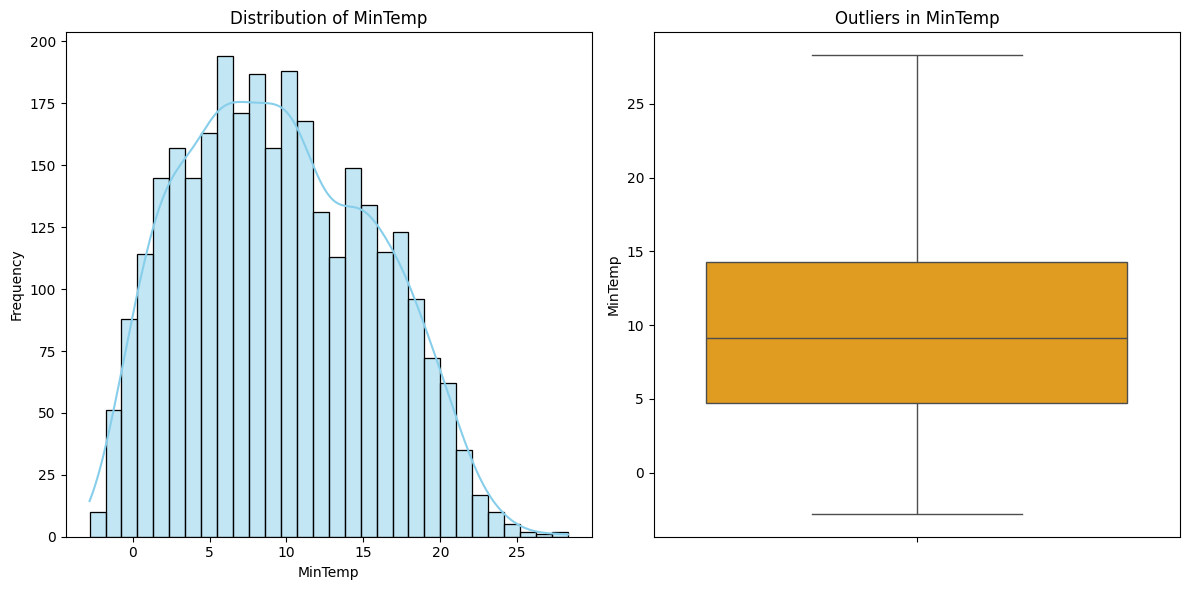

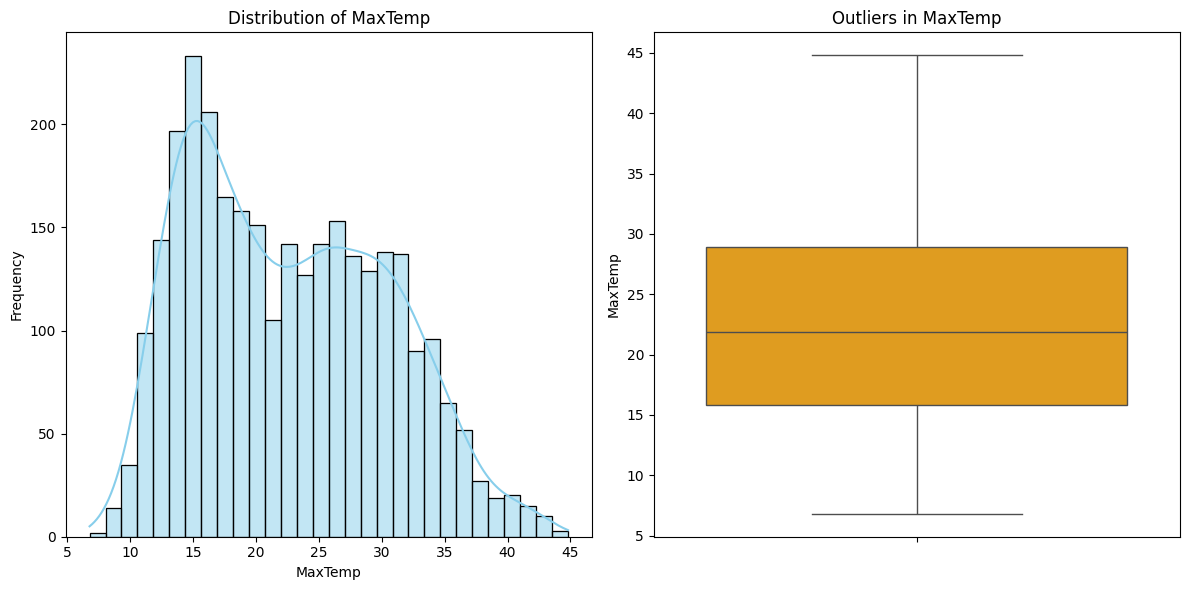

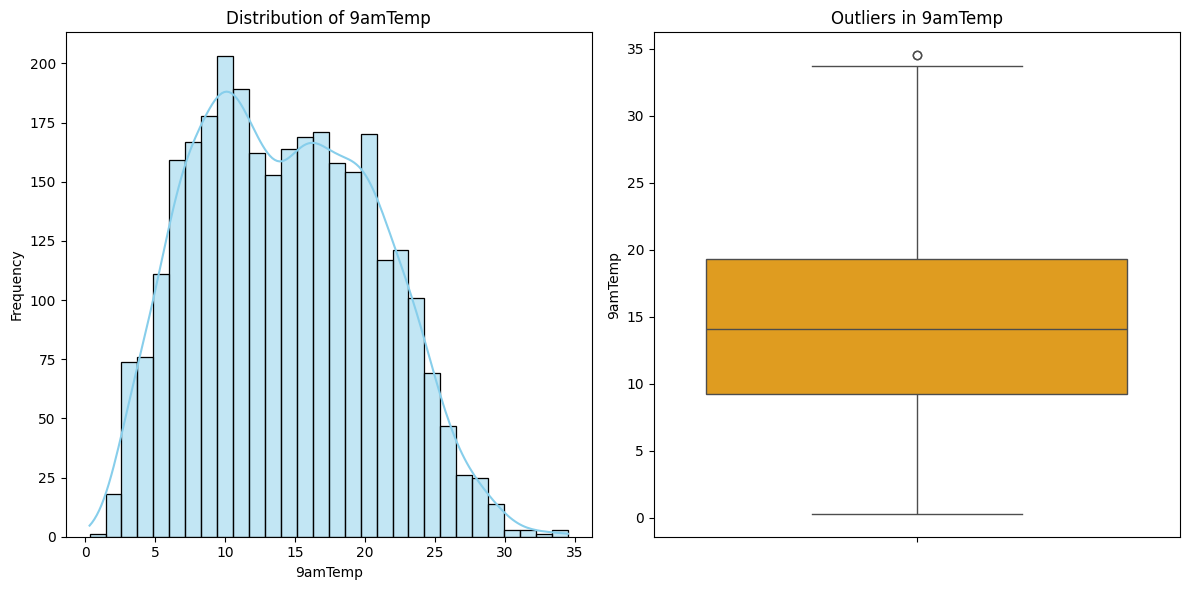

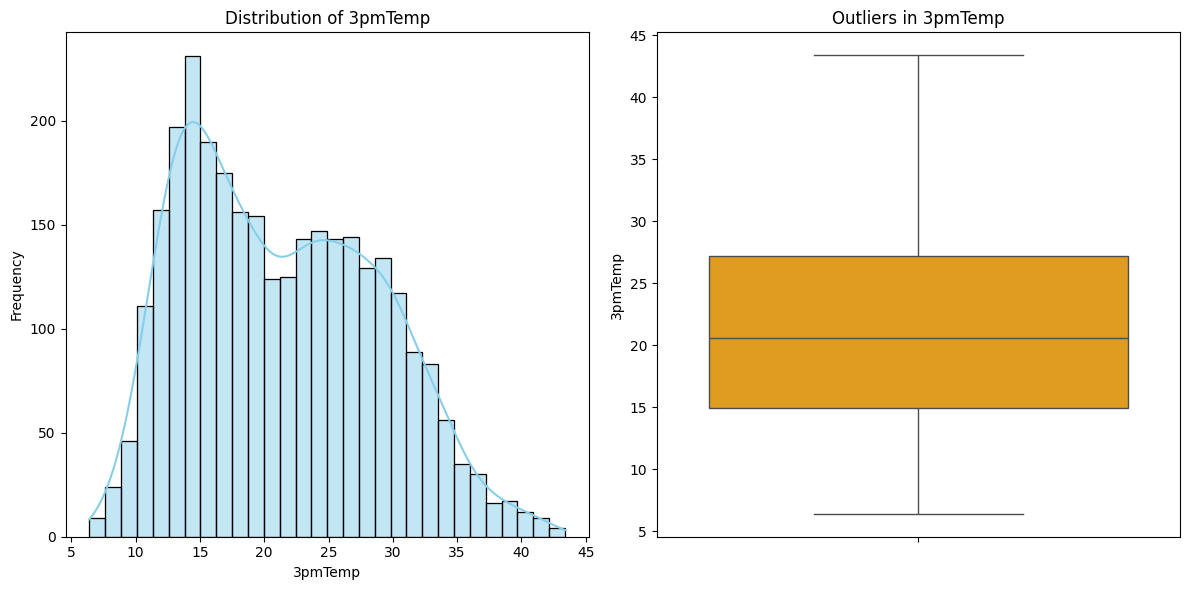

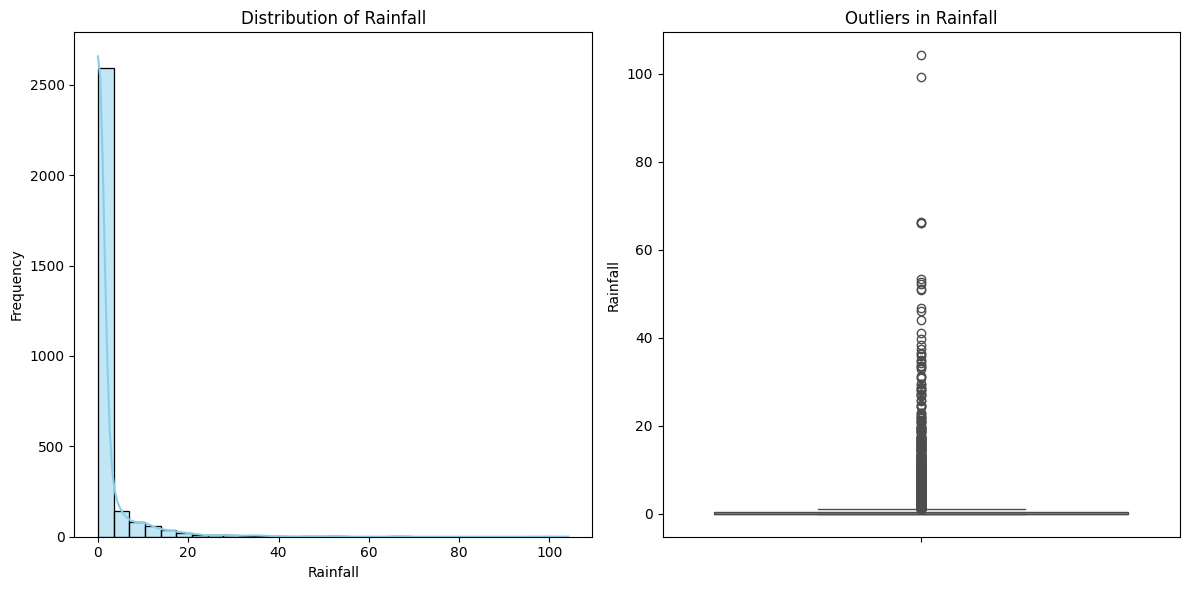

In [ ]:
# Visualizing the distribution and outliers of specific columns
columns_to_explore = ['MinTemp', 'MaxTemp', '9amTemp', '3pmTemp', 'Rainfall']

# Looping through the selected columns to generate visualizations
for col in columns_to_explore:
    plt.figure(figsize=(12, 6))  # Setting figure size for better visibility

    # Creating the first subplot: Distribution plot with histogram and KDE (Kernel Density Estimate)
    plt.subplot(1, 2, 1)  # Grid layout: 1 row, 2 columns, 1st subplot
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')  # Plotting the histogram with KDE overlay
    plt.title(f"Distribution of {col}")  # Title of the plot
    plt.xlabel(col)  # Labeling the x-axis
    plt.ylabel("Frequency")  # Labeling the y-axis

    # Creating the second subplot: Boxplot to identify outliers
    plt.subplot(1, 2, 2)  # Grid layout: 1 row, 2 columns, 2nd subplot
    sns.boxplot(y=df[col], color='orange')  # Plotting a boxplot to visualize outliers
    plt.title(f"Outliers in {col}")  # Title of the plot
    plt.ylabel(col)  # Labeling the y-axis

    plt.tight_layout()  # Adjusting layout to prevent overlap
    plt.show()  # Displaying the plots

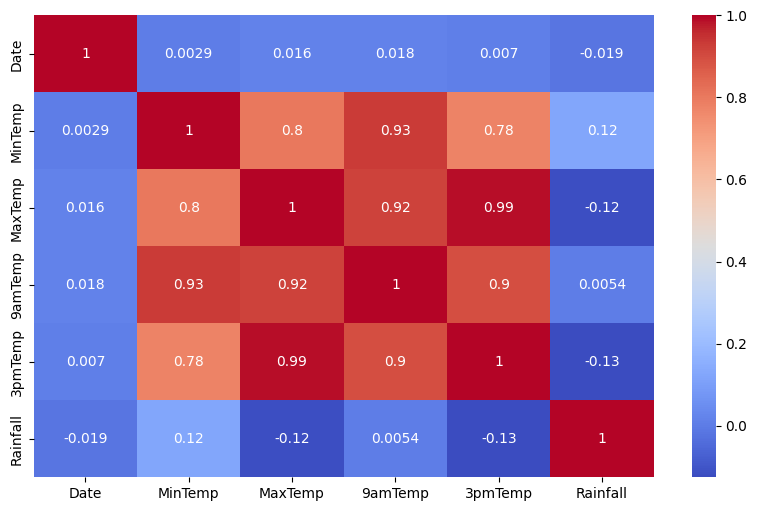

In [ ]:
# Generating a heatmap to visualize the correlation between numerical columns
plt.figure(figsize=(10, 6))  # Setting the figure size for the heatmap

# Creating the heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # annot=True adds correlation coefficients in each cell, cmap='coolwarm' defines the color scheme
plt.show()  # Displaying the heatmap

<Figure size 1400x800 with 0 Axes>

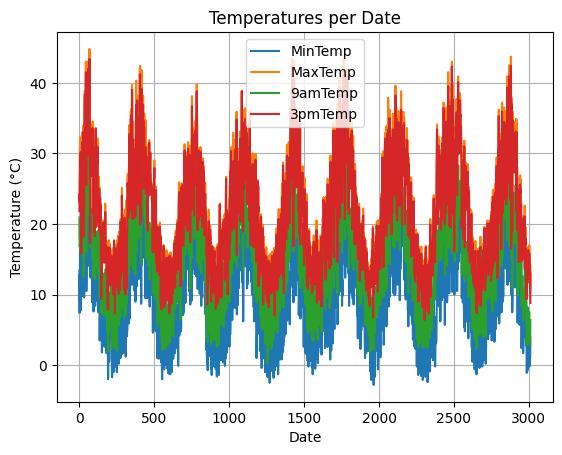

In [ ]:
# Plotting the temperature trends over time for multiple columns
plt.figure(figsize=(14, 8))  # Setting the figure size for better visibility

# Plotting the selected columns ('MinTemp', 'MaxTemp', '9amTemp', '3pmTemp') over time (indexed by 'Date')
df[['MinTemp', 'MaxTemp', '9amTemp', '3pmTemp']].plot()

# Adding plot titles and labels
plt.title('Temperatures per Date')  # Title of the plot
plt.xlabel('Date')  # Label for the x-axis (dates)
plt.ylabel('Temperature (°C)')  # Label for the y-axis (temperature)

# Adding a legend to distinguish the temperature columns
plt.legend(['MinTemp', 'MaxTemp', '9amTemp', '3pmTemp'])

# Enabling gridlines for easier readability
plt.grid()

# Displaying the plot
plt.show()

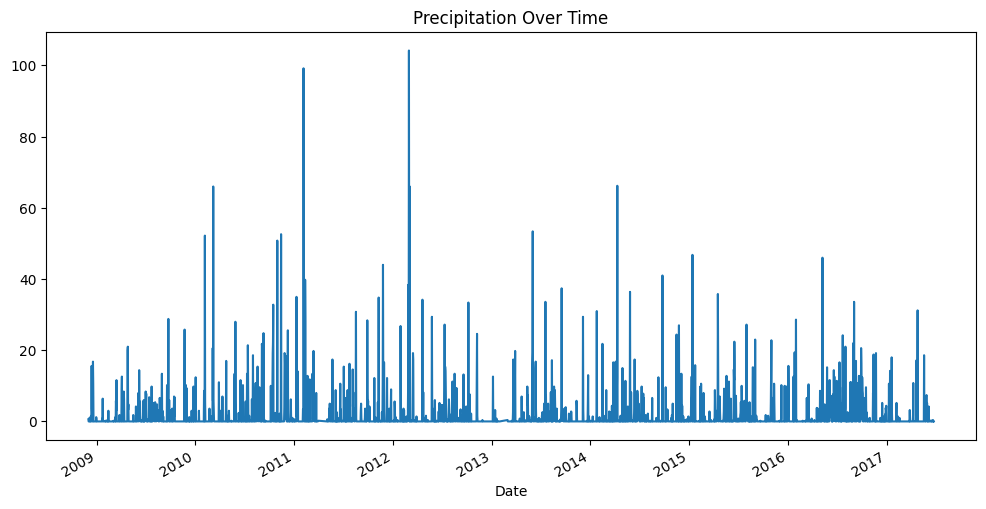

In [ ]:
# Plotting the rainfall trend over time using the 'Date' column as the index
df.set_index('Date')['Rainfall'].plot(figsize=(12, 6), title="Precipitation Over Time")

# Displaying the plot
plt.show()

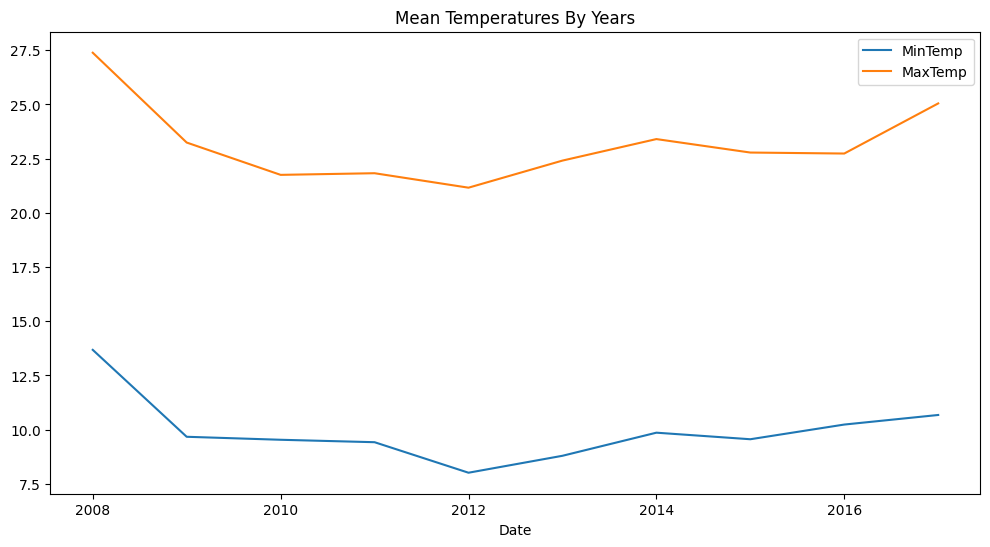

In [ ]:
# Calculating the mean temperatures (MinTemp and MaxTemp) grouped by year
df.groupby(df['Date'].dt.year)[['MinTemp', 'MaxTemp']].mean().plot(
    figsize=(12, 6),  # Setting the figure size for better visibility
    title="Mean Temperatures By Years"  # Adding a title to the plot
)

# Displaying the plot
plt.show()

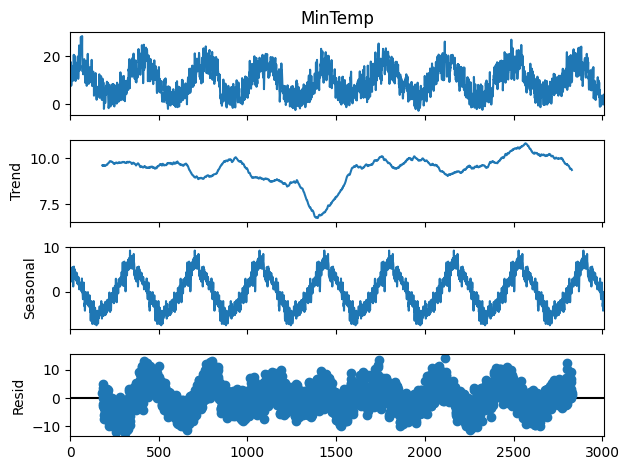

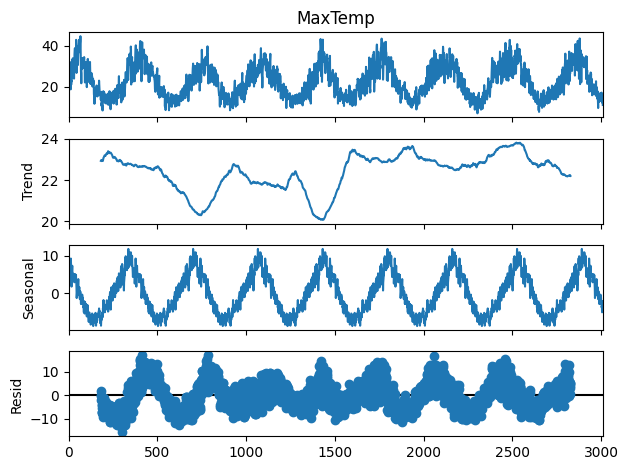

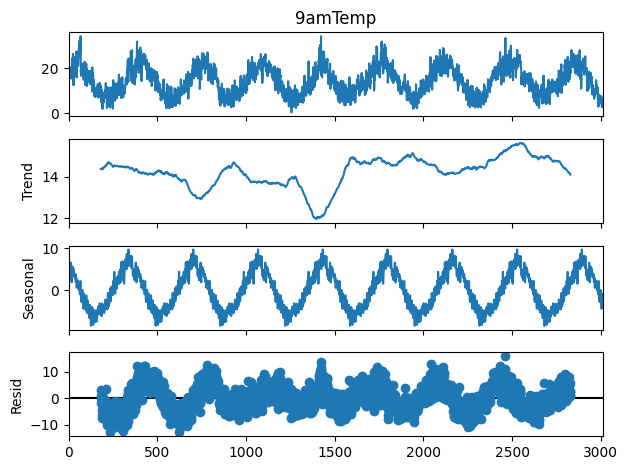

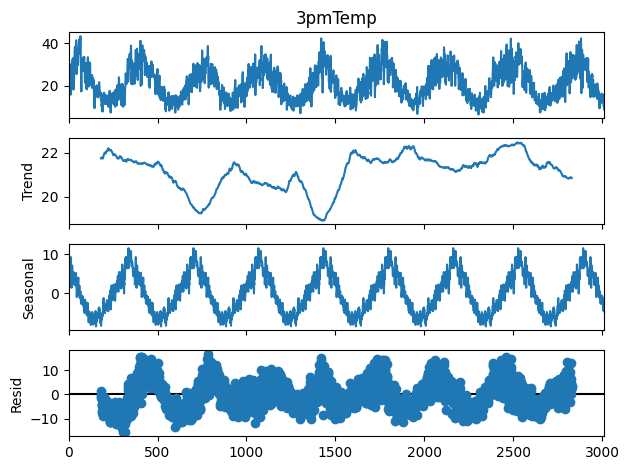

In [ ]:
# Performing seasonal decomposition on temperature columns
temperature_columns = ['MinTemp', 'MaxTemp', '9amTemp', '3pmTemp']

# Iterating through each temperature column to apply seasonal decomposition
for col in temperature_columns:
    # Decomposing the time series into trend, seasonal, and residual components
    result = seasonal_decompose(df[col], model='additive', period=365)

    # Plotting the decomposition results
    result.plot()
    plt.show()

## **Data Cleaning and Transformation**

In [ ]:
# Filling missing values in specific columns with the mean or median of the respective columns
df.fillna({
    'MinTemp': df['MinTemp'].mean(),  # Filling missing 'MinTemp' with the mean value of that column
    'MaxTemp': df['MaxTemp'].mean(),  # Filling missing 'MaxTemp' with the mean value of that column
    '9amTemp': df['9amTemp'].mean(),  # Filling missing '9amTemp' with the mean value of that column
    '3pmTemp': df['3pmTemp'].mean(),  # Filling missing '3pmTemp' with the mean value of that column
    'Rainfall': df['Rainfall'].median()  # Filling missing 'Rainfall' with the median value of that column
}, inplace=True)  # `inplace=True` modifies the DataFrame directly

In [ ]:
# Checking if there are any remaining missing values after imputation
df.isnull().sum()

,0
Date,0
MinTemp,0
MaxTemp,0
9amTemp,0
3pmTemp,0
Rainfall,0


In [ ]:
# Sorting the DataFrame by the 'Date' column
df.sort_values(by='Date', inplace=True)

In [ ]:
# Normalizing target columns using MinMaxScaler
target_cols = ['MinTemp', 'MaxTemp', '9amTemp', '3pmTemp', 'Rainfall']

# Dictionary to store the scalers for each column
scalers = {}

# Iterating over the target columns to scale each one
for col in target_cols:
    # Initializing a MinMaxScaler for the column
    scalers[col] = MinMaxScaler()

    # Applying the scaler to the column and replacing the original values with scaled values
    df[col] = scalers[col].fit_transform(df[[col]])

## **Sequence Preparation**

In [ ]:
# Function to create sequences of data for time series modeling
def create_sequences(data, target, window_size):
    """
    Creates input-output sequences from time series data.

    Parameters:
        data (array-like): The input time series data.
        target (array-like): The target variable corresponding to the time series.
        window_size (int): The number of time steps to include in each input sequence.

    Returns:
        X (numpy.ndarray): Array of input sequences with shape (num_sequences, window_size).
        y (numpy.ndarray): Array of target values with shape (num_sequences,).
    """
    X, y = [], []
    # Looping through the data to create sequences
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])  # Input sequence of length `window_size`
        y.append(target[i+window_size])  # Target value after the sequence
    return np.array(X), np.array(y)

# Defining the window size for the sequences
window_size = 20

# Creating sequences for each target column and storing them in a dictionary
sequences = {}
for col in target_cols:
    # Generating input-output pairs for the column
    X, y = create_sequences(df[col].values, df[col].values, window_size)
    # Storing the sequences for the column
    sequences[col] = (X, y)

In [ ]:
# Splitting the sequences into training and testing sets for each target column
train_test_data = {}

for col in target_cols:
    # Extracting the input-output sequences for the current column
    X, y = sequences[col]

    # Splitting the data into training and testing sets
    # - `test_size=0.2` reserves 20% of the data for testing
    # - `random_state=42` ensures reproducibility of the splits
    # - `shuffle=False` maintains the temporal order of the time series
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Storing the splits in a dictionary for the current column
    train_test_data[col] = (X_train, X_test, y_train, y_test)

In [ ]:
# Checking the shapes of the training and testing datasets for the last processed target column
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2392, 20), (599, 20), (2392,), (599,))

## **Model Design and Training**

In [ ]:
# Function to build an LSTM model for time series prediction
def build_lstm_model(input_shape):
    """
    Builds and compiles an LSTM model for time series prediction.

    Parameters:
        input_shape (tuple): Shape of the input data (timesteps, features).

    Returns:
        model (tf.keras.Sequential): Compiled LSTM model.
    """
    # Initializing a Sequential model
    model = Sequential([
        # First LSTM layer with 64 units and ReLU activation
        LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape),

        # Second LSTM layer with 32 units and no sequence output (final output of the time steps)
        LSTM(32, activation='relu'),

        # Dropout layer to reduce overfitting
        Dropout(0.2),

        # Dense layer with 1 unit to output the final prediction
        Dense(1)
    ])

    # Compiling the model with Adam optimizer and Mean Squared Error loss
    model.compile(optimizer='adam', loss='mse')

    return model

In [ ]:
# Define a directory to save the best models
checkpoint_dir = "checkpoints"  # Folder where the best models will be stored
os.makedirs(checkpoint_dir, exist_ok=True)  # Ensure the directory exists

# Initialize dictionaries to store trained models and their training history
models = {}  # Dictionary to store models for each target column
history = {}  # Dictionary to store training history for each target column

# Iterate over each target column
for col in target_cols:
    # Split the data for the current target column into training and testing sets
    X_train, X_test, y_train, y_test = train_test_data[col]

    # Build a new LSTM model for the current target column
    model = build_lstm_model((X_train.shape[1], 1))  # Define input shape as (window_size, 1)

    # Reshape the training and testing data to match the LSTM input format
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Define the file path to save the best model for the current target column
    checkpoint_path = os.path.join(checkpoint_dir, f"best_model_{col}.keras")

    # Create a ModelCheckpoint callback to save the best model during training
    checkpoint = ModelCheckpoint(
        filepath=checkpoint_path,  # Path to save the model
        monitor='val_loss',       # Metric to monitor for improvements
        save_best_only=True,      # Save the model only if val_loss improves
        verbose=1                 # Print a message when the model is saved
    )

    # Train the model with the checkpoint callback
    history[col] = model.fit(
        X_train, y_train,              # Training data and labels
        epochs=20,                     # Number of epochs
        batch_size=32,                 # Batch size
        validation_data=(X_test, y_test),  # Validation data for monitoring performance
        callbacks=[checkpoint],        # Include the checkpoint callback
        verbose=2                      # Display detailed training output
    )

    # Store the trained model in the models dictionary
    models[col] = model

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.01398, saving model to checkpoints/best_model_MinTemp.keras
75/75 - 8s - 110ms/step - loss: 0.0331 - val_loss: 0.0140
Epoch 2/20

Epoch 2: val_loss did not improve from 0.01398
75/75 - 1s - 17ms/step - loss: 0.0181 - val_loss: 0.0143
Epoch 3/20

Epoch 3: val_loss improved from 0.01398 to 0.01367, saving model to checkpoints/best_model_MinTemp.keras
75/75 - 1s - 16ms/step - loss: 0.0164 - val_loss: 0.0137
Epoch 4/20

Epoch 4: val_loss improved from 0.01367 to 0.01360, saving model to checkpoints/best_model_MinTemp.keras
75/75 - 1s - 16ms/step - loss: 0.0170 - val_loss: 0.0136
Epoch 5/20

Epoch 5: val_loss improved from 0.01360 to 0.01327, saving model to checkpoints/best_model_MinTemp.keras
75/75 - 1s - 17ms/step - loss: 0.0159 - val_loss: 0.0133
Epoch 6/20

Epoch 6: val_loss did not improve from 0.01327
75/75 - 1s - 16ms/step - loss: 0.0155 - val_loss: 0.0136
Epoch 7/20

Epoch 7: val_loss did not improve from 0.01327
75/75 - 1s - 16m

## **Evaluation and Results**

In [ ]:
# Displaying a summary of the model architecture
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 20, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,037 (343.90 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 58,692 (229.27 KB)

In [ ]:
# Evaluating the performance of each trained LSTM model
for col in target_cols:
    # Extracting the training and test data for the current target column
    X_train, X_test, y_train, y_test = train_test_data[col]
    model = models[col]  # Fetching the trained model for the current column

    # Predicting the values using the trained model
    # Reshaping X_test to match the expected input shape for the model
    y_pred = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

    # Inversing the scaling transformation to return the values to their original scale
    y_test = scalers[col].inverse_transform(y_test.reshape(-1, 1))
    y_pred = scalers[col].inverse_transform(y_pred)

    # Calculating evaluation metrics (Mean Squared Error and Mean Absolute Error)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Printing the performance metrics for the current target column
    print(f"{col}: MSE = {mse}, MAE = {mae}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
MinTemp: MSE = 10.868528524129891, MAE = 2.624191605149207
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
MaxTemp: MSE = 11.641481665278656, MAE = 2.677517213646279
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
9amTemp: MSE = 7.2161073164704685, MAE = 2.0465366525920685
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
3pmTemp: MSE = 15.406701726695957, MAE = 3.011141291126385
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step
Rainfall: MSE = 23.436180279971552, MAE = 2.8022827831452997


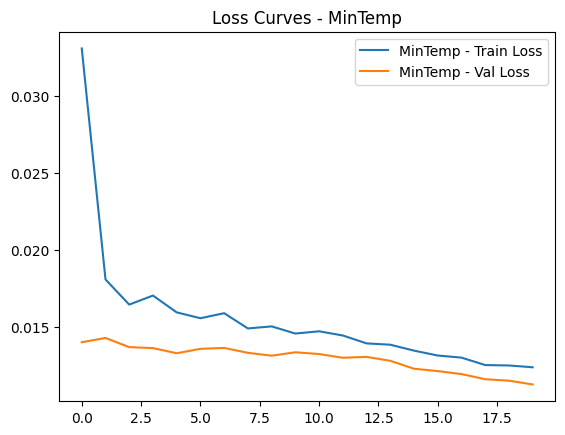

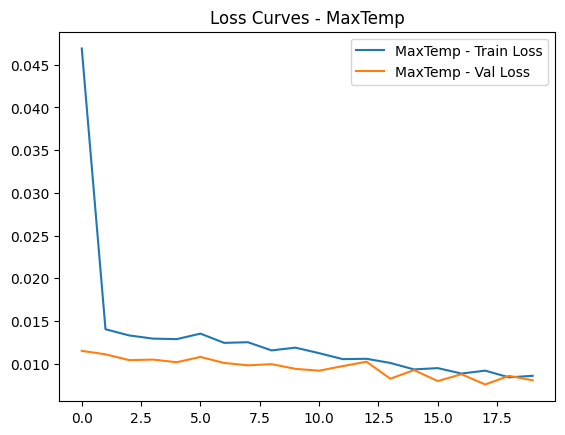

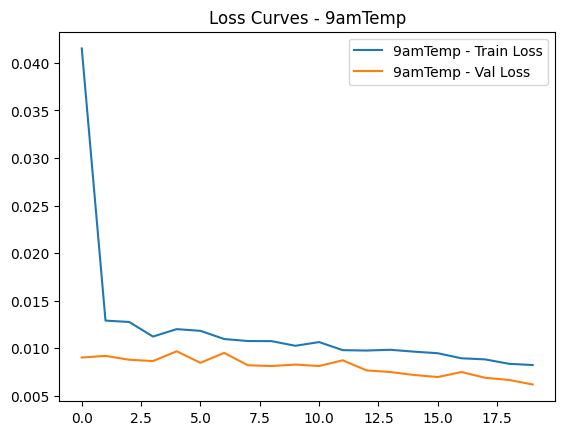

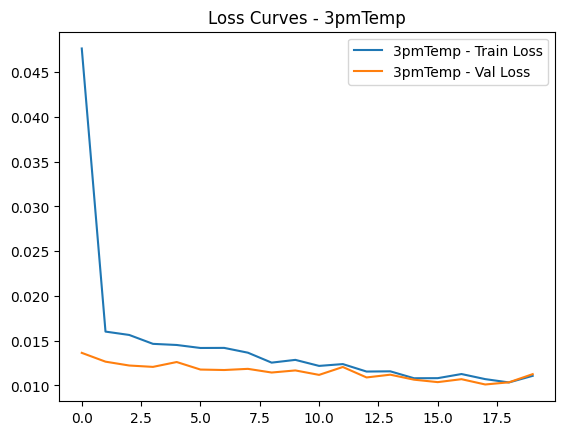

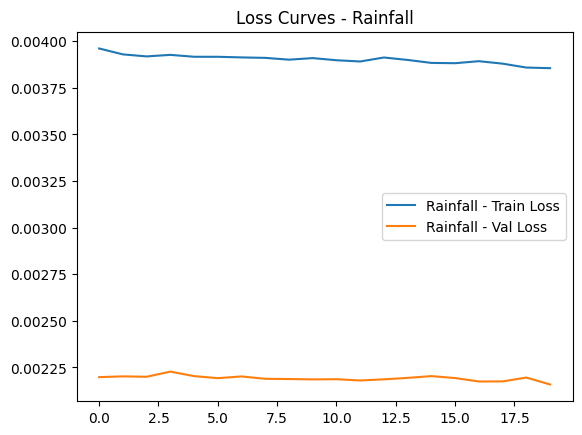

In [ ]:
# Plotting the training and validation loss curves for each target column
for col in target_cols:
    # Plotting the training loss over epochs
    plt.plot(history[col].history['loss'], label=f'{col} - Train Loss')
    # Plotting the validation loss over epochs
    plt.plot(history[col].history['val_loss'], label=f'{col} - Val Loss')

    # Setting the title for the current target column's loss curve
    plt.title(f'Loss Curves - {col}')

    # Adding a legend to distinguish between training and validation losses
    plt.legend()

    # Displaying the plot
    plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


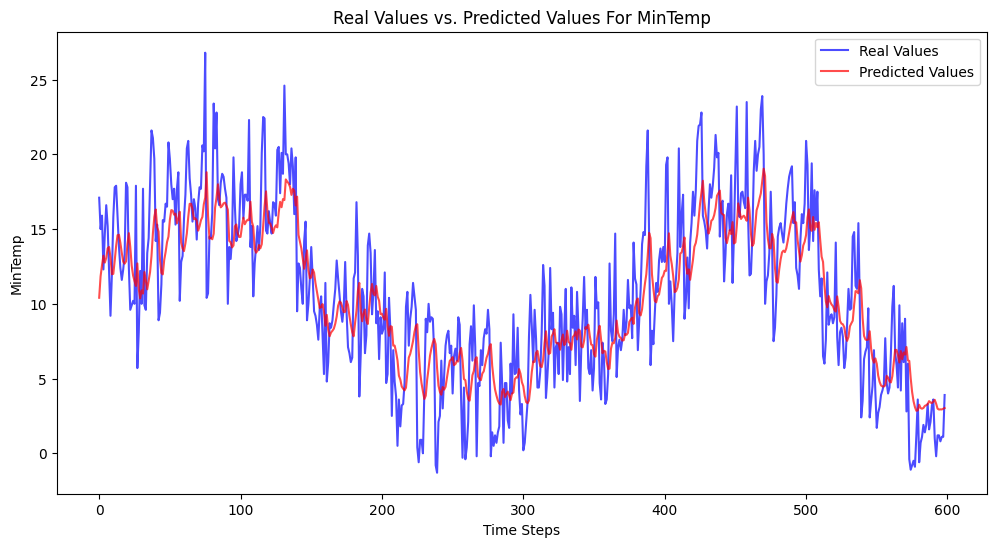

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


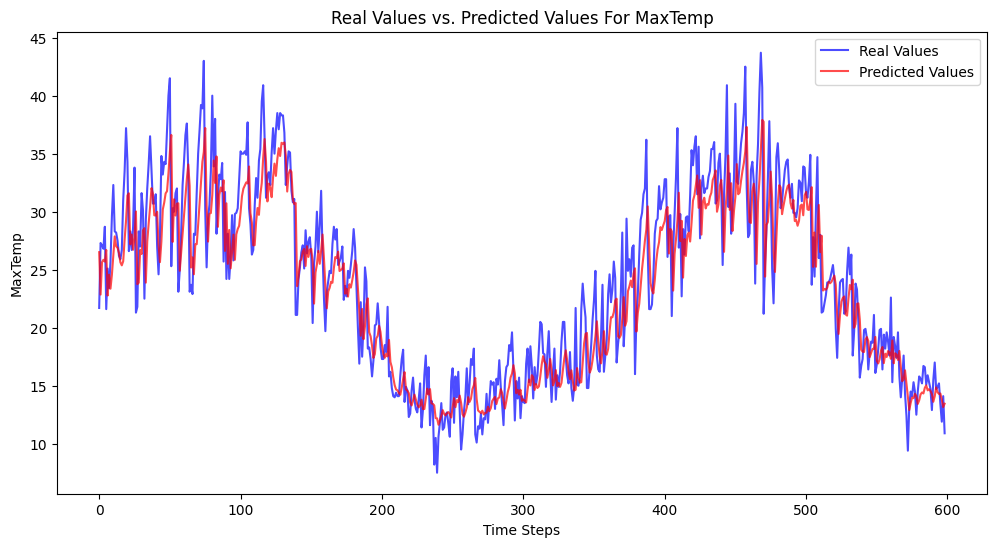

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


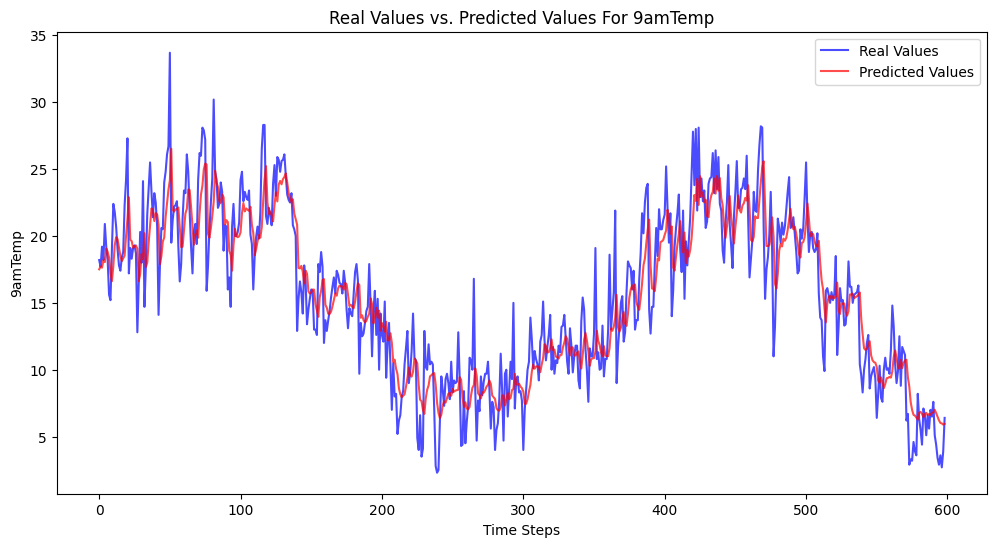

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


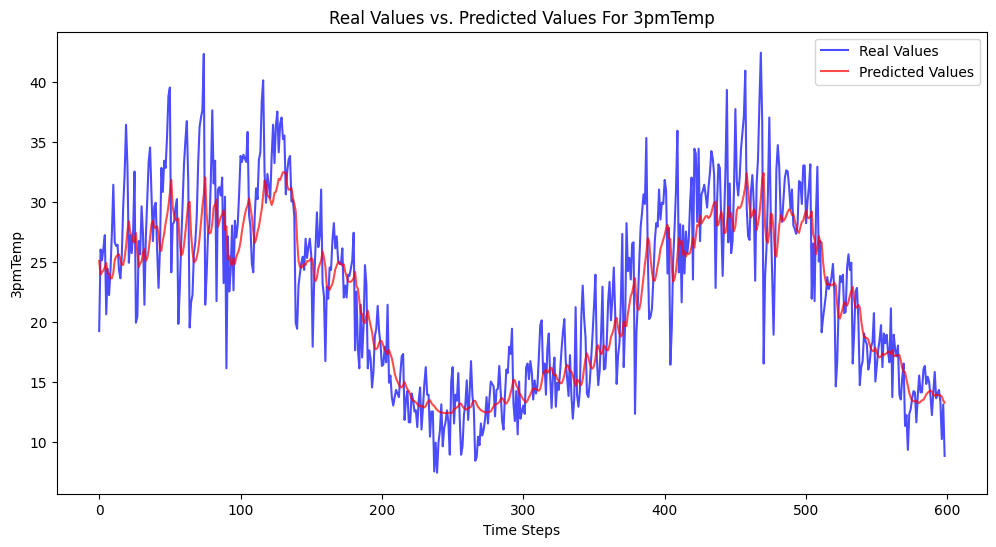

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


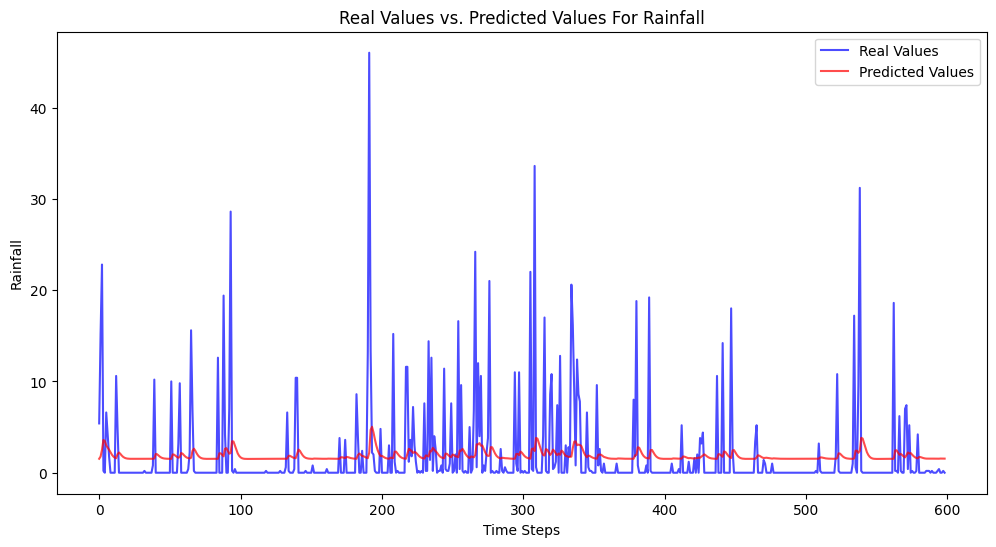

In [ ]:
# Plotting the real vs. predicted values for each target column
for col in target_cols:
    # Extracting the training and test data for the current target column
    X_train, X_test, y_train, y_test = train_test_data[col]
    model = models[col]  # Fetching the trained model for the current column

    # Predicting the values on the test data
    # Reshaping X_test to match the expected input shape for the model
    y_pred = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

    # Inversing the scaling transformation to return the values to their original scale
    y_test = scalers[col].inverse_transform(y_test.reshape(-1, 1))
    y_pred = scalers[col].inverse_transform(y_pred)

    # Creating a plot to compare real values with predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Real Values', color='blue', alpha=0.7)  # Plotting true values in blue
    plt.plot(y_pred, label='Predicted Values', color='red', alpha=0.7)  # Plotting predicted values in red

    # Setting the plot title and labels
    plt.title(f"Real Values vs. Predicted Values For {col}")
    plt.xlabel("Time Steps")
    plt.ylabel(col)

    # Adding a legend to distinguish between the real and predicted values
    plt.legend()

    # Displaying the plot
    plt.show()

In [ ]:
# Initializing an empty list to store results
results_data = []

# Looping through each target column to generate results for real vs. predicted values
for col in target_cols:
    # Extracting the training and test data for the current target column
    X_train, X_test, y_train, y_test = train_test_data[col]
    model = models[col]  # Fetching the trained model for the current column

    # Predicting the values on the test data
    # Reshaping X_test to match the expected input shape for the model
    y_pred = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

    # Inversing the scaling transformation to return the values to their original scale
    y_test = scalers[col].inverse_transform(y_test.reshape(-1, 1))
    y_pred = scalers[col].inverse_transform(y_pred)

    # Appending the results (true and predicted values) for the current target column to the list
    results_data.append({
        f'True {col}': y_test.flatten(),  # Flattening to 1D array
        f'Predicted {col}': y_pred.flatten()  # Flattening to 1D array
    })

# Creating a DataFrame to store the results for all columns
results_df = pd.DataFrame()

# Adding each result (true and predicted values) as columns to the DataFrame
for result in results_data:
    for key, value in result.items():
        results_df[key] = value

# Displaying the first few rows of the resulting DataFrame
results_df.head()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,True MinTemp,Predicted MinTemp,True MaxTemp,Predicted MaxTemp,True 9amTemp,Predicted 9amTemp,True 3pmTemp,Predicted 3pmTemp,True Rainfall,Predicted Rainfall
0,17.1,10.405690,21.7,26.509712,18.2,17.506281,19.2,25.047596,5.4,1.528100
1,15.0,11.844575,27.3,22.854588,17.7,17.717331,26.0,23.905214,15.2,1.773696
2,15.9,12.579913,27.1,25.640347,19.2,17.629171,25.1,24.108374,22.8,2.513339
3,12.3,13.222111,26.8,25.851610,18.2,18.186638,26.1,24.261194,0.2,3.584112
4,14.7,12.757331,28.7,25.695263,20.9,18.040813,27.2,24.518517,0.0,3.463440


## **Future Predictions**

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


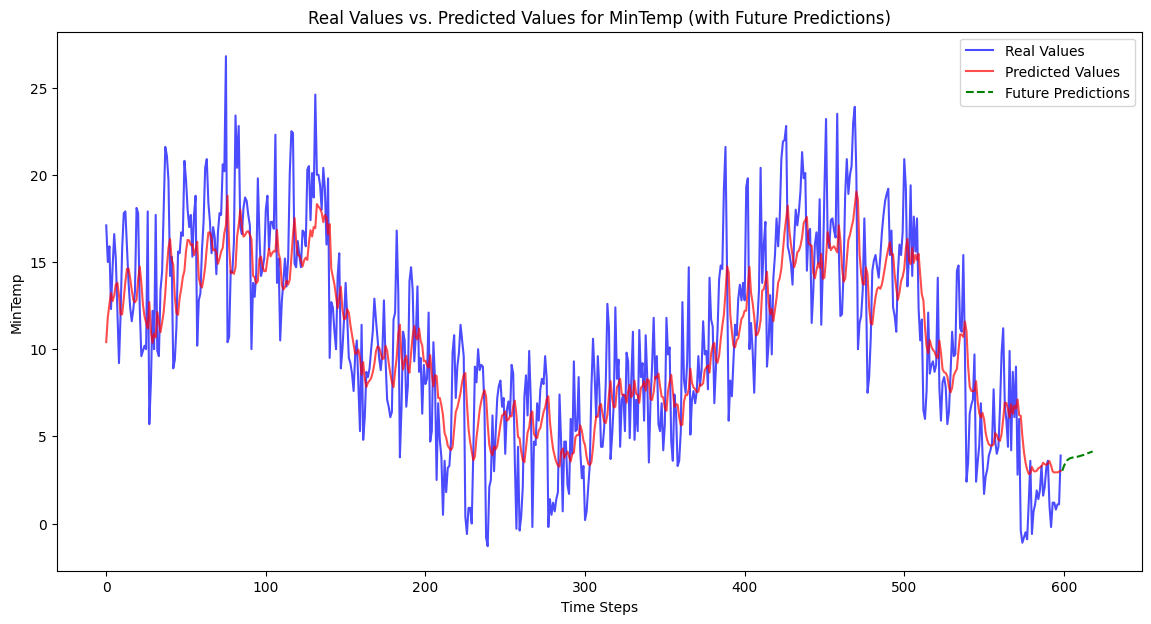

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


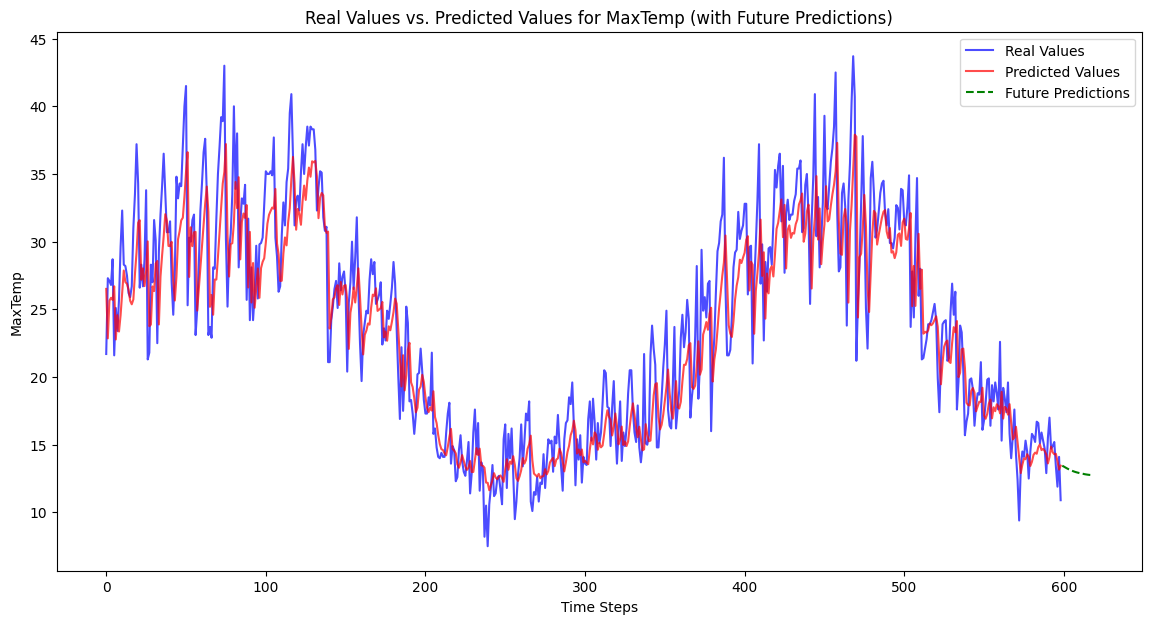

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


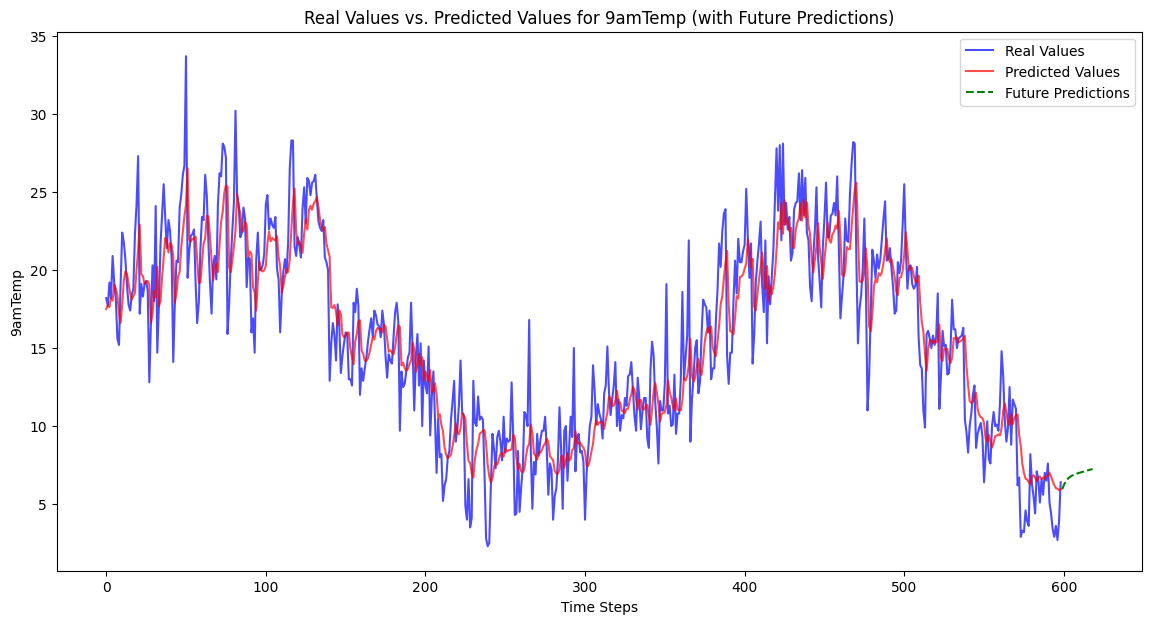

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


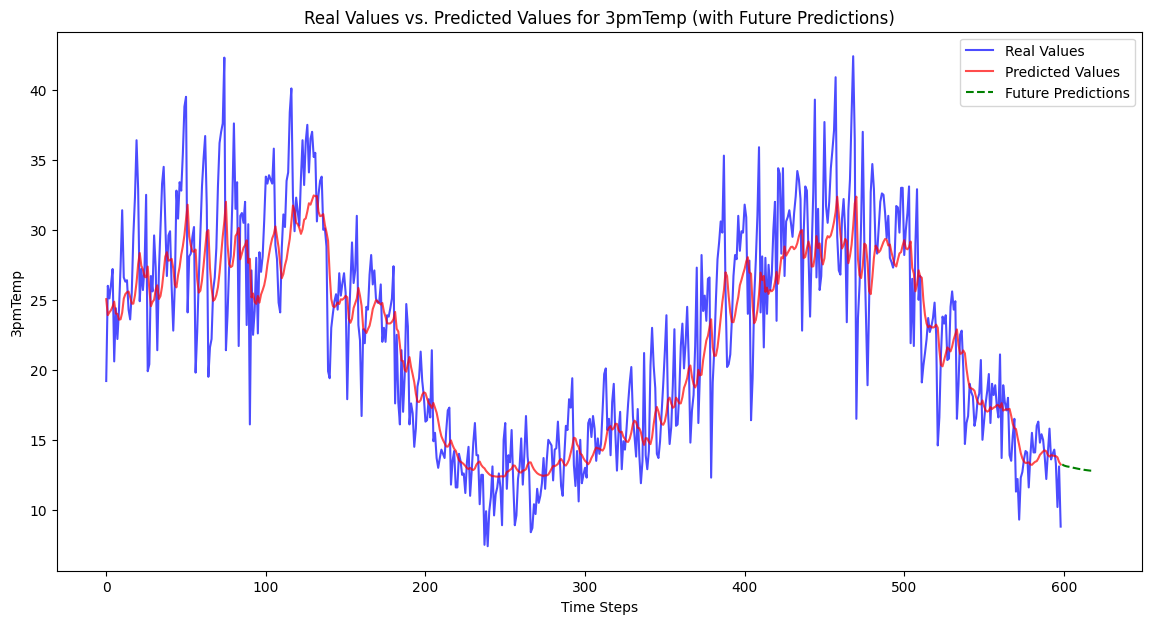

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


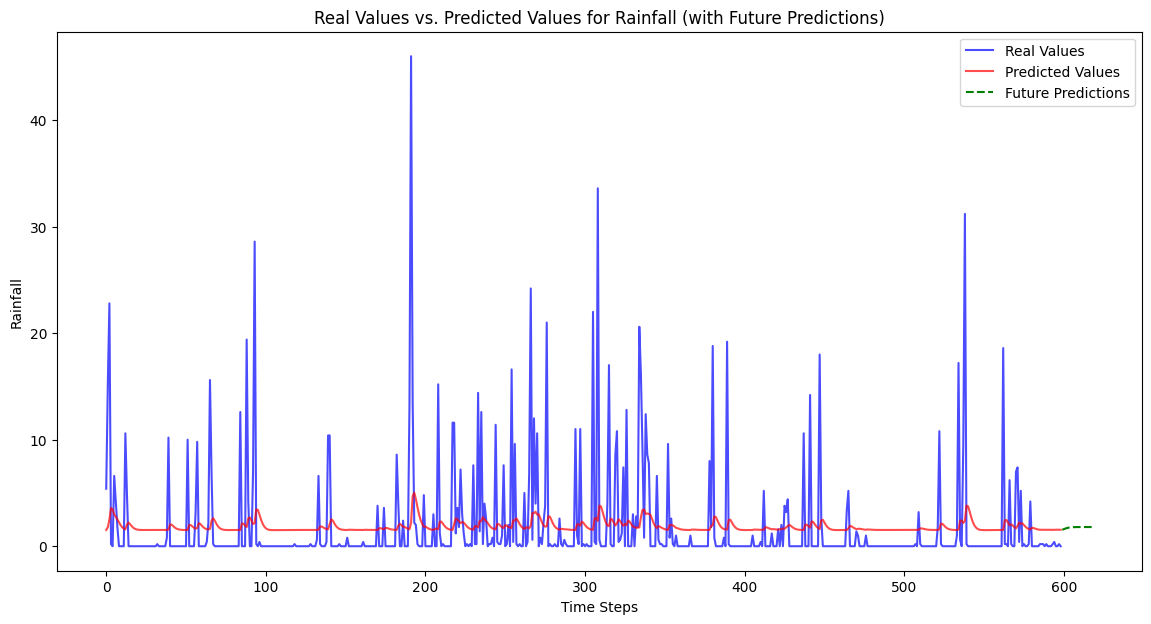

In [ ]:
# Forecasting future steps using the trained LSTM model for each target column
future_steps = 20  # Number of future steps to predict

for col in target_cols:
    # Extracting the training and test data for the current target column
    X_train, X_test, y_train, y_test = train_test_data[col]
    model = models[col]  # Fetching the trained model for the current column

    # Reshaping X_test to match the expected input shape for the model
    X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Predicting the values on the test data
    y_pred = model.predict(X_test_reshaped)

    # Inversing the scaling transformation to return the values to their original scale
    y_test_original = scalers[col].inverse_transform(y_test.reshape(-1, 1))
    y_pred_original = scalers[col].inverse_transform(y_pred)

    # Getting the last window from the test data to use for future prediction
    last_window = X_test[-1].reshape(1, -1, 1)
    future_preds = []  # List to store future predictions

    # Predicting the future steps iteratively
    for _ in range(future_steps):
        future_pred = model.predict(last_window)  # Predicting the next step
        future_preds.append(future_pred[0, 0])  # Storing the predicted value
        # Updating the window by shifting it and appending the new prediction
        last_window = np.append(last_window[:, 1:, :], future_pred.reshape(1, 1, 1), axis=1)

    # Inversing the scaling transformation for the future predictions
    future_preds_original = scalers[col].inverse_transform(np.array(future_preds).reshape(-1, 1))

    # Plotting the real, predicted, and future predicted values
    plt.figure(figsize=(14, 7))
    plt.plot(y_test_original, label='Real Values', color='blue', alpha=0.7)  # Real values (blue)
    plt.plot(y_pred_original, label='Predicted Values', color='red', alpha=0.7)  # Predicted values (red)
    plt.plot(range(len(y_test_original), len(y_test_original) + future_steps),
             future_preds_original, label='Future Predictions', color='green', linestyle='--')  # Future predictions (green, dashed)

    # Adding title, labels, and legend
    plt.title(f"Real Values vs. Predicted Values for {col} (with Future Predictions)")
    plt.xlabel("Time Steps")
    plt.ylabel(col)
    plt.legend()

    # Displaying the plot
    plt.show()